In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
import datetime as dt
from sklearn.model_selection import train_test_split 

import warnings
warnings.filterwarnings('ignore')

In [42]:
df = pd.read_csv('./USDM_SET_full.csv', parse_dates=True, low_memory=False).drop(columns=['Unnamed: 0'])
#df_train = pd.read_csv('./USDM_SET_full_train.csv', parse_dates=True, low_memory=False).drop(columns=['Unnamed: 0'])
#df_test = pd.read_csv('./USDM_SET_full_test.csv', parse_dates=True, low_memory=False).drop(columns=['Unnamed: 0'])

In [43]:
df

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID,wsum,FIPS STR,roff,evap,Region
0,2011-12-27,1007,Bibb County,AL,0.00,100.00,54.54,0.0,0.00,0.0,2011-12-27,2012-01-02,1,209.08,1007,-9999.0,-9999.0,Southeast
1,2012-01-03,1007,Bibb County,AL,0.00,100.00,54.54,0.0,0.00,0.0,2012-01-03,2012-01-09,1,209.08,1007,-9999.0,-9999.0,Southeast
2,2012-01-10,1007,Bibb County,AL,0.00,100.00,54.54,0.0,0.00,0.0,2012-01-10,2012-01-16,1,209.08,1007,-9999.0,-9999.0,Southeast
3,2012-01-17,1007,Bibb County,AL,41.41,58.59,0.00,0.0,0.00,0.0,2012-01-17,2012-01-23,1,58.59,1007,-9999.0,-9999.0,Southeast
4,2012-01-24,1007,Bibb County,AL,100.00,0.00,0.00,0.0,0.00,0.0,2012-01-24,2012-01-30,1,0.00,1007,-9999.0,-9999.0,Southeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238945,2022-01-25,56043,Washakie County,WY,0.00,100.00,100.00,100.0,0.00,0.0,2022-01-25,2022-01-31,1,600.00,56043,-9999.0,-9999.0,NorthernRR
238946,2022-02-01,56043,Washakie County,WY,0.00,100.00,100.00,100.0,0.00,0.0,2022-02-01,2022-02-07,1,600.00,56043,-9999.0,-9999.0,NorthernRR
238947,2022-02-08,56043,Washakie County,WY,0.00,100.00,100.00,100.0,16.75,0.0,2022-02-08,2022-02-14,1,667.00,56043,-9999.0,-9999.0,NorthernRR
238948,2022-02-15,56043,Washakie County,WY,0.00,100.00,100.00,100.0,52.39,0.0,2022-02-15,2022-02-21,1,809.56,56043,-9999.0,-9999.0,NorthernRR


## Train-test split (80/20) by regions

From each region (9 in total) we select 40 counties for train and 10 counties for test. 

In [ ]:
# df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['Region'], random_state=297) 

In [ ]:
# df_train

In [ ]:
# df_train.to_csv('./USDM_SET_full_train.csv')
# df_test.to_csv('./USDM_SET_full_test.csv')


## Train-test split (6 yrs/2 yrs) by time

We have 2012.1-2020.2 data, and first 2190 days we use for training, and the rest we use for prediction

### Model Prophet Baseline Y

It is really a trail using facebook's prophet package. Now only ensemble as a whole

In [4]:
from prophet import Prophet


Importing plotly failed. Interactive plots will not work.


In [119]:
df

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID,wsum,FIPS STR,roff,evap,Region
0,2011-12-27,1007,Bibb County,AL,0.00,100.00,54.54,0.0,0.00,0.0,2011-12-27,2012-01-02,1,209.08,1007,-9999.0,-9999.0,Southeast
1,2012-01-03,1007,Bibb County,AL,0.00,100.00,54.54,0.0,0.00,0.0,2012-01-03,2012-01-09,1,209.08,1007,-9999.0,-9999.0,Southeast
2,2012-01-10,1007,Bibb County,AL,0.00,100.00,54.54,0.0,0.00,0.0,2012-01-10,2012-01-16,1,209.08,1007,-9999.0,-9999.0,Southeast
3,2012-01-17,1007,Bibb County,AL,41.41,58.59,0.00,0.0,0.00,0.0,2012-01-17,2012-01-23,1,58.59,1007,-9999.0,-9999.0,Southeast
4,2012-01-24,1007,Bibb County,AL,100.00,0.00,0.00,0.0,0.00,0.0,2012-01-24,2012-01-30,1,0.00,1007,-9999.0,-9999.0,Southeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238945,2022-01-25,56043,Washakie County,WY,0.00,100.00,100.00,100.0,0.00,0.0,2022-01-25,2022-01-31,1,600.00,56043,-9999.0,-9999.0,NorthernRR
238946,2022-02-01,56043,Washakie County,WY,0.00,100.00,100.00,100.0,0.00,0.0,2022-02-01,2022-02-07,1,600.00,56043,-9999.0,-9999.0,NorthernRR
238947,2022-02-08,56043,Washakie County,WY,0.00,100.00,100.00,100.0,16.75,0.0,2022-02-08,2022-02-14,1,667.00,56043,-9999.0,-9999.0,NorthernRR
238948,2022-02-15,56043,Washakie County,WY,0.00,100.00,100.00,100.0,52.39,0.0,2022-02-15,2022-02-21,1,809.56,56043,-9999.0,-9999.0,NorthernRR


In [120]:
df = df.groupby('MapDate').mean()

In [121]:
df = df.reset_index(level=0)


In [122]:
df = df[['MapDate','wsum']]

In [123]:
df = df.rename(columns={"MapDate": "ds", "wsum": "y"})

In [124]:
df

,ds,y
0,2011-12-27,158.135578
1,2012-01-03,171.981822
2,2012-01-10,180.075489
3,2012-01-17,186.391511
4,2012-01-24,188.478933
...,...,...
526,2022-01-25,269.610067
527,2022-02-01,271.782578
528,2022-02-08,271.091533
529,2022-02-15,281.693578


In [125]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [126]:

future = m.make_future_dataframe(periods=51,freq='W')
future.tail(100)


,ds
482,2021-03-23
483,2021-03-30
484,2021-04-06
485,2021-04-13
486,2021-04-20
...,...
577,2023-01-15
578,2023-01-22
579,2023-01-29
580,2023-02-05


In [127]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(100)


,ds,yhat,yhat_lower,yhat_upper
482,2021-03-23,243.347729,172.743019,314.315796
483,2021-03-30,245.957882,174.017220,313.413093
484,2021-04-06,248.297947,172.992308,314.743820
485,2021-04-13,249.923057,173.425676,321.844475
486,2021-04-20,251.847971,183.343798,324.554264
...,...,...,...,...
577,2023-01-15,484.939621,414.275179,558.472190
578,2023-01-22,488.137116,415.596169,564.588875
579,2023-01-29,489.203931,414.390477,560.410099
580,2023-02-05,487.919622,417.336704,559.178600


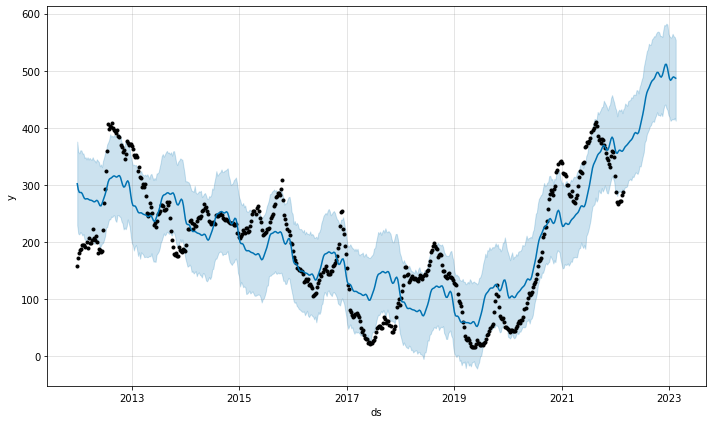

In [128]:
fig1 = m.plot(forecast)

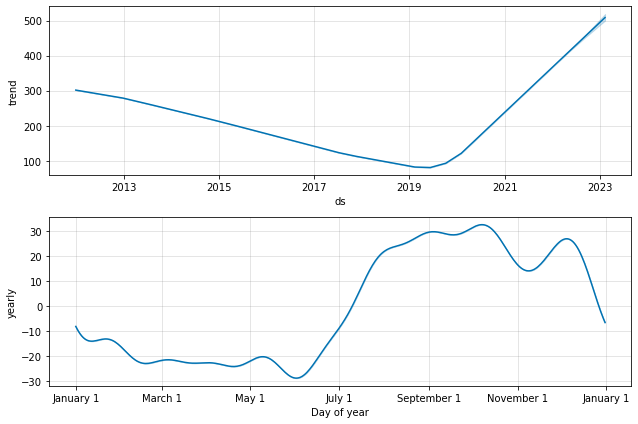

In [129]:
fig2 = m.plot_components(forecast)


In [130]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='2190 days', period='365 days', horizon = '8 days')
# cutoff starts at initial, for every period days, on a horizon horizon

INFO:prophet:Making 5 forecasts with cutoffs between 2018-02-15 00:00:00 and 2022-02-14 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

In [131]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-02-20,29.139171,-35.424777,91.687640,144.371733,2018-02-15
1,2019-02-19,105.575817,39.328874,171.062768,78.003089,2019-02-15
2,2020-02-18,31.774060,-33.730381,100.429134,43.259267,2020-02-15
3,2021-02-16,167.082447,87.811507,232.660952,284.184289,2021-02-14
4,2022-02-15,368.531670,297.398468,441.316719,281.693578,2022-02-14


In [132]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,7540.854190,86.838092,86.838092,0.308271,0.308271,0.267102,0.0
1,2 days,13712.841423,117.101842,117.101842,0.412063,0.412063,0.518992,0.0
2,3 days,131.909984,11.485207,11.485207,0.265497,0.265497,0.306136,1.0
3,4 days,760.255357,27.572728,27.572728,0.353483,0.353483,0.300391,1.0
4,5 days,13278.543373,115.232562,115.232562,0.798166,0.798166,1.328246,0.0
5,8 days,7072.542037,84.098407,84.098407,0.293023,0.293023,0.255578,0.0


##### print(df_p)

In [ ]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [ ]:
cutoffs = pd.to_datetime(['2013-02-15', '2013-08-15', '2014-02-15'])

In [ ]:
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

Considering the probabilities of 

Pooled OLS for other data
Consider R^2, ACF on residual

LSTM: https://melaniesoek0120.medium.com/covid-19-global-data-time-series-prediction-with-lstm-recurrent-neural-networks-f7825c4a1f6f

There are two ways to solve time-series panel data: either loop throughout the model for each county’s data or the county’ panel data once. If you try both and obtain the RMSE for each way, you can compare the result and choose the best way for your time series panel data.




### Model Prophet Baseline change of Y


In [49]:
df['ydiff'] = df['y'].diff(periods=1)

In [50]:
df2= df[['ds','ydiff']]
df2 = df2.rename(columns={"sd": "ds", "ydiff": "y"})

In [51]:
df2

,ds,y
0,2011-12-27,NaN
1,2012-01-03,13.846244
2,2012-01-10,8.093667
3,2012-01-17,6.316022
4,2012-01-24,2.087422
...,...,...
526,2022-01-25,2.660000
527,2022-02-01,2.172511
528,2022-02-08,-0.691044
529,2022-02-15,10.602044


In [52]:
m2 = Prophet()
m2.fit(df2)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [53]:
future2 = m2.make_future_dataframe(periods=51,freq='W')
future2.tail(100)

,ds
482,2021-03-23
483,2021-03-30
484,2021-04-06
485,2021-04-13
486,2021-04-20
...,...
577,2023-01-15
578,2023-01-22
579,2023-01-29
580,2023-02-05


In [54]:
forecast2 = m2.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(100)


,ds,yhat,yhat_lower,yhat_upper
482,2021-03-23,0.554225,-11.185933,12.470336
483,2021-03-30,0.752012,-10.610854,13.332890
484,2021-04-06,0.049119,-11.882474,13.308445
485,2021-04-13,-0.551590,-11.854936,10.433198
486,2021-04-20,0.095882,-12.242652,11.726826
...,...,...,...,...
577,2023-01-15,-0.813600,-13.279975,11.808198
578,2023-01-22,0.047435,-12.139887,12.456774
579,2023-01-29,-0.553907,-12.257391,11.150269
580,2023-02-05,-1.645020,-13.812409,10.104269


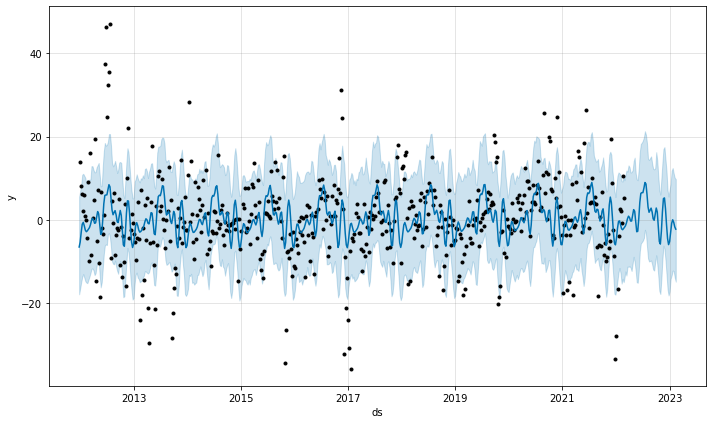

In [55]:
fig1_2 = m2.plot(forecast2)

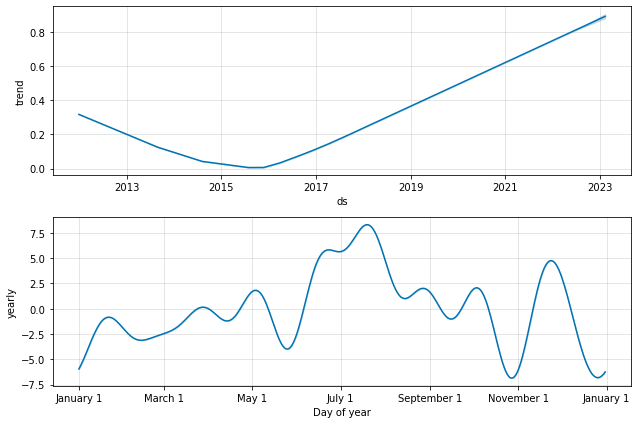

In [56]:
fig2_2 = m2.plot_components(forecast2)

In [57]:
df_cv2 = cross_validation(m2, initial='2190 days', period='365 days', horizon = '8 days')
# cutoff starts at initial, for every period days, on a horizon horizon

INFO:prophet:Making 5 forecasts with cutoffs between 2018-02-15 00:00:00 and 2022-02-14 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

In [58]:
df_p2 = performance_metrics(df_cv2)
df_p2


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,194.024152,13.929255,13.929255,1.313827,1.313827,2.000000,0.0
1,2 days,170.971458,13.075605,13.075605,0.876202,0.876202,1.559359,0.0
2,3 days,20.617979,4.540702,4.540702,15.570495,15.570495,1.772346,1.0
3,4 days,36.943691,6.078132,6.078132,0.597833,0.597833,0.852728,1.0
4,5 days,47.111305,6.863768,6.863768,2.449790,2.449790,2.000000,1.0
5,8 days,68.972529,8.304970,8.304970,1.564149,1.564149,2.000000,1.0


### Regional Model

### 1. Southwest

In [11]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [60]:
df = pd.read_csv('./USDM_SET_full.csv', parse_dates=True, low_memory=False).drop(columns=['Unnamed: 0'])

In [61]:
dfsw = df[df['Region']=='Southwest']
dfsw

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID,wsum,FIPS STR,roff,evap,Region
4248,2011-12-27,4005,Coconino County,AZ,17.67,82.33,53.67,18.13,3.64,0.0,2011-12-27,2012-01-02,1,258.62,4005,-9999.0,-9999.0,Southwest
4249,2012-01-03,4005,Coconino County,AZ,17.67,82.33,53.67,18.13,3.64,0.0,2012-01-03,2012-01-09,1,258.62,4005,-9999.0,-9999.0,Southwest
4250,2012-01-10,4005,Coconino County,AZ,17.67,82.33,53.67,18.13,3.64,0.0,2012-01-10,2012-01-16,1,258.62,4005,-9999.0,-9999.0,Southwest
4251,2012-01-17,4005,Coconino County,AZ,0.23,99.77,53.67,18.13,3.64,0.0,2012-01-17,2012-01-23,1,276.06,4005,-9999.0,-9999.0,Southwest
4252,2012-01-24,4005,Coconino County,AZ,0.01,99.99,53.67,18.13,3.64,0.0,2012-01-24,2012-01-30,1,276.28,4005,-9999.0,-9999.0,Southwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212926,2022-01-25,49057,Weber County,UT,0.00,100.00,100.00,100.00,1.21,0.0,2022-01-25,2022-01-31,1,604.84,49057,-9999.0,-9999.0,Southwest
212927,2022-02-01,49057,Weber County,UT,0.00,100.00,100.00,100.00,1.21,0.0,2022-02-01,2022-02-07,1,604.84,49057,-9999.0,-9999.0,Southwest
212928,2022-02-08,49057,Weber County,UT,0.00,100.00,100.00,100.00,1.50,0.0,2022-02-08,2022-02-14,1,606.00,49057,-9999.0,-9999.0,Southwest
212929,2022-02-15,49057,Weber County,UT,0.00,100.00,100.00,100.00,1.50,0.0,2022-02-15,2022-02-21,1,606.00,49057,-9999.0,-9999.0,Southwest


In [62]:
dfsw = dfsw.groupby('MapDate').mean()
dfsw = dfsw.reset_index(level=0)
dfsw = dfsw[['MapDate','wsum']]
dfsw = dfsw.rename(columns={"MapDate": "ds", "wsum": "y"})

In [63]:
msw = Prophet()
msw.fit(dfsw)
futuresw = msw.make_future_dataframe(periods=51,freq='W')
futuresw.tail(100)
forecastsw = msw.predict(futuresw)
forecastsw[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(100)



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
482,2021-03-23,608.234077,314.665082,902.858969
483,2021-03-30,614.201115,325.677584,894.141872
484,2021-04-06,620.619420,347.879142,930.335653
485,2021-04-13,625.601900,342.743197,938.113199
486,2021-04-20,630.437754,338.048159,932.273910
...,...,...,...,...
577,2023-01-15,832.307214,543.799920,1142.497343
578,2023-01-22,837.544361,549.868590,1134.249994
579,2023-01-29,837.482459,523.072320,1129.497298
580,2023-02-05,833.373912,563.969696,1152.601019


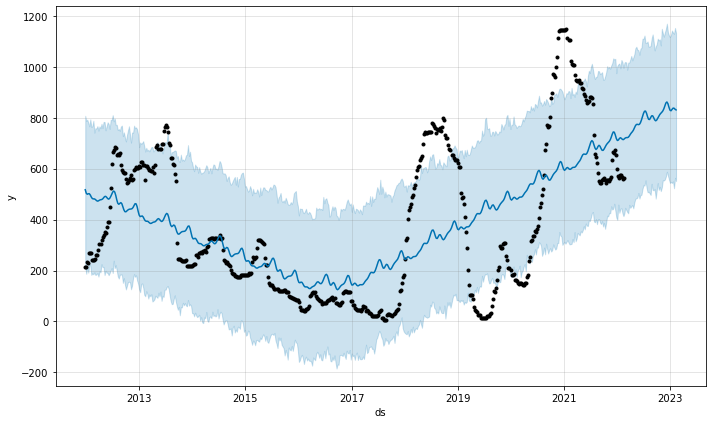

In [117]:
fig1sw = msw.plot(forecastsw)
#plt.title('Southwest')


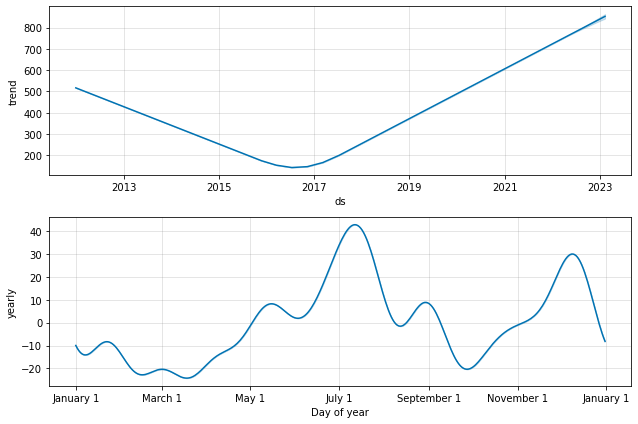

In [65]:
fig2sw = msw.plot_components(forecastsw)


In [66]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
df_cvsw = cross_validation(msw, initial='2190 days', period='365 days', horizon = '8 days')
df_psw = performance_metrics(df_cvsw)
df_psw

INFO:prophet:Making 5 forecasts with cutoffs between 2018-02-15 00:00:00 and 2022-02-14 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,33044.285750,181.780873,181.780873,0.323864,0.323864,0.278729,1.0
1,2 days,218204.310938,467.123443,467.123443,0.456129,0.456129,0.590890,0.0
2,3 days,26771.467805,163.619888,163.619888,1.074843,1.074843,0.699121,1.0
3,4 days,100851.599958,317.571409,317.571409,0.772849,0.772849,0.557440,0.0
4,5 days,191771.862641,437.917644,437.917644,0.894986,0.894986,1.619863,0.0
5,8 days,33486.900667,182.994264,182.994264,0.324396,0.324396,0.279123,1.0


### 2. West

In [67]:
dfw = df[df['Region']=='West']
dfw

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID,wsum,FIPS STR,roff,evap,Region
11682,2011-12-27,6003,Alpine County,CA,0.0,100.0,0.0,0.00,0.0,0.0,2011-12-27,2012-01-02,1,100.00,6003,-9999.0,-9999.0,West
11683,2012-01-03,6003,Alpine County,CA,0.0,100.0,100.0,0.00,0.0,0.0,2012-01-03,2012-01-09,1,300.00,6003,-9999.0,-9999.0,West
11684,2012-01-10,6003,Alpine County,CA,0.0,100.0,100.0,99.99,0.0,0.0,2012-01-10,2012-01-16,1,599.97,6003,-9999.0,-9999.0,West
11685,2012-01-17,6003,Alpine County,CA,0.0,100.0,100.0,99.99,0.0,0.0,2012-01-17,2012-01-23,1,599.97,6003,-9999.0,-9999.0,West
11686,2012-01-24,6003,Alpine County,CA,0.0,100.0,100.0,0.00,0.0,0.0,2012-01-24,2012-01-30,1,300.00,6003,-9999.0,-9999.0,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133276,2022-01-25,32510,Carson City,NV,0.0,100.0,100.0,0.00,0.0,0.0,2022-01-25,2022-01-31,1,300.00,32510,-9999.0,-9999.0,West
133277,2022-02-01,32510,Carson City,NV,0.0,100.0,100.0,0.00,0.0,0.0,2022-02-01,2022-02-07,1,300.00,32510,-9999.0,-9999.0,West
133278,2022-02-08,32510,Carson City,NV,0.0,100.0,100.0,0.00,0.0,0.0,2022-02-08,2022-02-14,1,300.00,32510,-9999.0,-9999.0,West
133279,2022-02-15,32510,Carson City,NV,0.0,100.0,100.0,0.00,0.0,0.0,2022-02-15,2022-02-21,1,300.00,32510,-9999.0,-9999.0,West


In [68]:
dfw = dfw.groupby('MapDate').mean()
dfw = dfw.reset_index(level=0)
dfw = dfw[['MapDate','wsum']]
dfw = dfw.rename(columns={"MapDate": "ds", "wsum": "y"})

In [69]:
mw = Prophet()
mw.fit(dfw)
futurew = mw.make_future_dataframe(periods=51,freq='W')
futurew.tail(100)
forecastw = mw.predict(futurew)
forecastw[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(100)



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
482,2021-03-23,671.759825,490.133841,864.616537
483,2021-03-30,672.833389,486.804190,867.462798
484,2021-04-06,678.364080,486.501567,855.273386
485,2021-04-13,686.251838,492.431646,876.262569
486,2021-04-20,695.108174,509.606595,892.155184
...,...,...,...,...
577,2023-01-15,1436.896989,1217.750710,1652.725838
578,2023-01-22,1437.510676,1223.167629,1643.479440
579,2023-01-29,1431.993086,1212.770553,1649.510500
580,2023-02-05,1424.834888,1222.840830,1652.951934


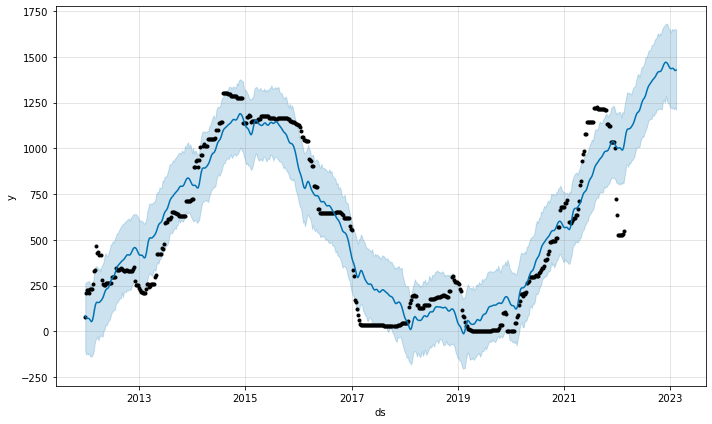

In [70]:
fig1w = mw.plot(forecastw)

In [71]:
df_cvw = cross_validation(mw, initial='2190 days', period='365 days', horizon = '8 days')
df_pw = performance_metrics(df_cvw)
df_pw

INFO:prophet:Making 5 forecasts with cutoffs between 2018-02-15 00:00:00 and 2022-02-14 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,287718.403185,536.393888,536.393888,1.013041,1.013041,0.672437,0.0
1,2 days,30024.359259,173.275386,173.275386,0.293010,0.293010,0.343306,0.0
2,3 days,5345.479677,73.112787,73.112787,0.809235,0.809235,1.359186,1.0
3,4 days,25965.006978,161.136610,161.136610,3.300641,3.300641,1.245374,0.0
4,5 days,190077.561870,435.978855,435.978855,2.243287,2.243287,2.000000,0.0
5,8 days,300801.006416,548.453286,548.453286,1.000707,1.000707,0.666981,0.0


### 3. Northwest

In [72]:
dfnw = df[df['Region']=='Northwest']
dfnw

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID,wsum,FIPS STR,roff,evap,Region
54693,2011-12-27,16007,Bear Lake County,ID,100.0,0.0,0.0,0.0,0.0,0.0,2011-12-27,2012-01-02,1,0.0,16007,-9999.0,-9999.0,Northwest
54694,2012-01-03,16007,Bear Lake County,ID,100.0,0.0,0.0,0.0,0.0,0.0,2012-01-03,2012-01-09,1,0.0,16007,-9999.0,-9999.0,Northwest
54695,2012-01-10,16007,Bear Lake County,ID,0.0,100.0,0.0,0.0,0.0,0.0,2012-01-10,2012-01-16,1,100.0,16007,-9999.0,-9999.0,Northwest
54696,2012-01-17,16007,Bear Lake County,ID,0.0,100.0,0.0,0.0,0.0,0.0,2012-01-17,2012-01-23,1,100.0,16007,-9999.0,-9999.0,Northwest
54697,2012-01-24,16007,Bear Lake County,ID,0.0,100.0,0.0,0.0,0.0,0.0,2012-01-24,2012-01-30,1,100.0,16007,-9999.0,-9999.0,Northwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225670,2022-01-25,53073,Whatcom County,WA,100.0,0.0,0.0,0.0,0.0,0.0,2022-01-25,2022-01-31,1,0.0,53073,-9999.0,-9999.0,Northwest
225671,2022-02-01,53073,Whatcom County,WA,100.0,0.0,0.0,0.0,0.0,0.0,2022-02-01,2022-02-07,1,0.0,53073,-9999.0,-9999.0,Northwest
225672,2022-02-08,53073,Whatcom County,WA,100.0,0.0,0.0,0.0,0.0,0.0,2022-02-08,2022-02-14,1,0.0,53073,-9999.0,-9999.0,Northwest
225673,2022-02-15,53073,Whatcom County,WA,100.0,0.0,0.0,0.0,0.0,0.0,2022-02-15,2022-02-21,1,0.0,53073,-9999.0,-9999.0,Northwest


In [73]:
dfnw = dfnw.groupby('MapDate').mean()
dfnw = dfnw.reset_index(level=0)
dfnw = dfnw[['MapDate','wsum']]
dfnw = dfnw.rename(columns={"MapDate": "ds", "wsum": "y"})

In [74]:
mnw = Prophet()
mnw.fit(dfnw)
futurenw = mnw.make_future_dataframe(periods=51,freq='W')
futurenw.tail(100)
forecastnw = mnw.predict(futurenw)
forecastnw[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(100)



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
482,2021-03-23,331.936291,182.264040,486.261664
483,2021-03-30,332.263993,181.612553,475.423077
484,2021-04-06,335.378630,190.065192,483.554236
485,2021-04-13,342.125809,188.699091,477.472687
486,2021-04-20,353.118569,210.650203,501.074289
...,...,...,...,...
577,2023-01-15,764.142785,607.440500,920.217488
578,2023-01-22,771.684843,614.154809,922.366077
579,2023-01-29,774.427294,615.949394,933.899093
580,2023-02-05,771.135591,614.004964,924.709989


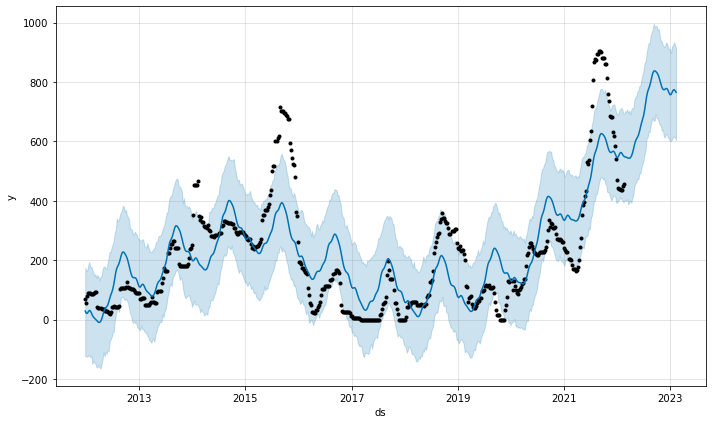

In [75]:
fig1nw = mnw.plot(forecastnw)

In [79]:
df_cvnw = cross_validation(mnw, initial='2190 days', period='365 days', horizon = '8 days')
df_pnw = performance_metrics(df_cvnw)
df_pnw

INFO:prophet:Making 5 forecasts with cutoffs between 2018-02-15 00:00:00 and 2022-02-14 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,12080.896402,109.913131,109.913131,0.243694,0.243694,0.217226,1.0
1,2 days,450.734611,21.230511,21.230511,0.105317,0.105317,0.111171,1.0
2,3 days,177.550434,13.324805,13.324805,0.152076,0.152076,0.164591,1.0
3,4 days,49.766041,7.054505,7.054505,0.034946,0.034946,0.035567,1.0
4,5 days,29538.964217,171.869032,171.869032,2.956134,2.956134,2.000000,0.0
5,8 days,10548.135521,102.704116,102.704116,0.225589,0.225589,0.202723,1.0


### 4. Northeast

In [80]:
dfne = df[df['Region']=='Northeast']
dfne

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID,wsum,FIPS STR,roff,evap,Region
43011,2011-12-27,9001,Fairfield County,CT,100.0,0.0,0.0,0.0,0.0,0.0,2011-12-27,2012-01-02,1,0.0,9001,-9999.0,-9999.0,Northeast
43012,2012-01-03,9001,Fairfield County,CT,100.0,0.0,0.0,0.0,0.0,0.0,2012-01-03,2012-01-09,1,0.0,9001,-9999.0,-9999.0,Northeast
43013,2012-01-10,9001,Fairfield County,CT,100.0,0.0,0.0,0.0,0.0,0.0,2012-01-10,2012-01-16,1,0.0,9001,-9999.0,-9999.0,Northeast
43014,2012-01-17,9001,Fairfield County,CT,100.0,0.0,0.0,0.0,0.0,0.0,2012-01-17,2012-01-23,1,0.0,9001,-9999.0,-9999.0,Northeast
43015,2012-01-24,9001,Fairfield County,CT,100.0,0.0,0.0,0.0,0.0,0.0,2012-01-24,2012-01-30,1,0.0,9001,-9999.0,-9999.0,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214519,2022-01-25,50025,Windham County,VT,100.0,0.0,0.0,0.0,0.0,0.0,2022-01-25,2022-01-31,1,0.0,50025,-9999.0,-9999.0,Northeast
214520,2022-02-01,50025,Windham County,VT,100.0,0.0,0.0,0.0,0.0,0.0,2022-02-01,2022-02-07,1,0.0,50025,-9999.0,-9999.0,Northeast
214521,2022-02-08,50025,Windham County,VT,100.0,0.0,0.0,0.0,0.0,0.0,2022-02-08,2022-02-14,1,0.0,50025,-9999.0,-9999.0,Northeast
214522,2022-02-15,50025,Windham County,VT,100.0,0.0,0.0,0.0,0.0,0.0,2022-02-15,2022-02-21,1,0.0,50025,-9999.0,-9999.0,Northeast


In [81]:
dfne = dfne.groupby('MapDate').mean()
dfne = dfne.reset_index(level=0)
dfne = dfne[['MapDate','wsum']]
dfne = dfne.rename(columns={"MapDate": "ds", "wsum": "y"})

In [82]:
mne = Prophet()
mne.fit(dfne)
futurene = mne.make_future_dataframe(periods=51,freq='W')
futurene.tail(100)
forecastne = mne.predict(futurene)
forecastne[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(100)



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
482,2021-03-23,9.828148,-64.113111,80.324653
483,2021-03-30,12.492406,-55.989964,84.346467
484,2021-04-06,18.437232,-55.853654,91.847901
485,2021-04-13,24.834037,-46.676074,93.298583
486,2021-04-20,28.243752,-48.734472,104.472846
...,...,...,...,...
577,2023-01-15,12.485052,-61.275612,88.056794
578,2023-01-22,10.659418,-63.252236,80.389955
579,2023-01-29,9.089750,-67.544029,81.246701
580,2023-02-05,6.260521,-62.955249,73.490182


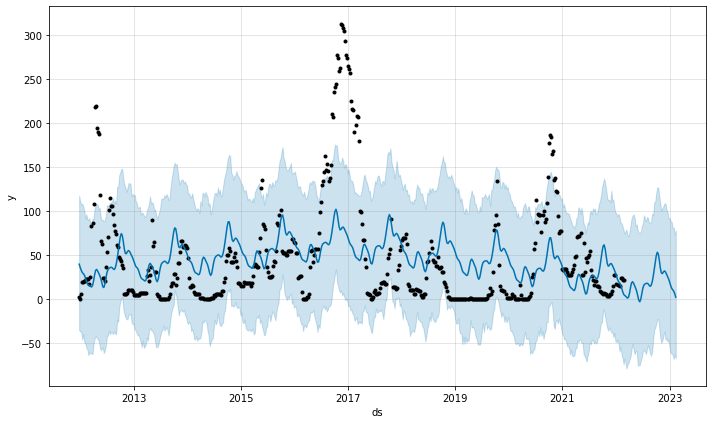

In [83]:
fig1ne = mne.plot(forecastne)

In [118]:
df_cvne = cross_validation(mne, initial='2190 days', period='365 days', horizon = '8 days')
df_pne = performance_metrics(df_cvne)
df_pne

INFO:prophet:Making 5 forecasts with cutoffs between 2018-02-15 00:00:00 and 2022-02-14 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,1 days,209.605913,14.477773,14.477773,0.659616,0.984219,1.0
1,2 days,115.040908,10.725712,10.725712,0.393261,0.489514,1.0
2,3 days,459.886403,21.444962,21.444962,inf,2.000000,1.0
3,4 days,2.685908,1.638874,1.638874,inf,2.000000,1.0
4,5 days,4479.151691,66.926465,66.926465,4.416539,1.376611,1.0
5,8 days,308.308444,17.558714,17.558714,0.799985,1.333292,1.0


### 5. NorthernRR

In [85]:
dfnrr = df[df['Region']=='NorthernRR']
dfnrr

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID,wsum,FIPS STR,roff,evap,Region
112572,2011-12-27,30031,Gallatin County,MT,100.0,0.0,0.0,0.0,0.00,0.0,2011-12-27,2012-01-02,1,0.00,30031,-9999.0,-9999.0,NorthernRR
112573,2012-01-03,30031,Gallatin County,MT,100.0,0.0,0.0,0.0,0.00,0.0,2012-01-03,2012-01-09,1,0.00,30031,-9999.0,-9999.0,NorthernRR
112574,2012-01-10,30031,Gallatin County,MT,100.0,0.0,0.0,0.0,0.00,0.0,2012-01-10,2012-01-16,1,0.00,30031,-9999.0,-9999.0,NorthernRR
112575,2012-01-17,30031,Gallatin County,MT,100.0,0.0,0.0,0.0,0.00,0.0,2012-01-17,2012-01-23,1,0.00,30031,-9999.0,-9999.0,NorthernRR
112576,2012-01-24,30031,Gallatin County,MT,100.0,0.0,0.0,0.0,0.00,0.0,2012-01-24,2012-01-30,1,0.00,30031,-9999.0,-9999.0,NorthernRR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238945,2022-01-25,56043,Washakie County,WY,0.0,100.0,100.0,100.0,0.00,0.0,2022-01-25,2022-01-31,1,600.00,56043,-9999.0,-9999.0,NorthernRR
238946,2022-02-01,56043,Washakie County,WY,0.0,100.0,100.0,100.0,0.00,0.0,2022-02-01,2022-02-07,1,600.00,56043,-9999.0,-9999.0,NorthernRR
238947,2022-02-08,56043,Washakie County,WY,0.0,100.0,100.0,100.0,16.75,0.0,2022-02-08,2022-02-14,1,667.00,56043,-9999.0,-9999.0,NorthernRR
238948,2022-02-15,56043,Washakie County,WY,0.0,100.0,100.0,100.0,52.39,0.0,2022-02-15,2022-02-21,1,809.56,56043,-9999.0,-9999.0,NorthernRR


In [86]:
dfnrr = dfnrr.groupby('MapDate').mean()
dfnrr = dfnrr.reset_index(level=0)
dfnrr = dfnrr[['MapDate','wsum']]
dfnrr = dfnrr.rename(columns={"MapDate": "ds", "wsum": "y"})

In [87]:
mnrr = Prophet()
mnrr.fit(dfnrr)
futurenrr = mnrr.make_future_dataframe(periods=51,freq='W')
futurenrr.tail(100)
forecastnrr = mnrr.predict(futurenrr)
forecastnrr[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(100)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
482,2021-03-23,238.259449,11.557777,447.220728
483,2021-03-30,242.347145,14.425481,450.907770
484,2021-04-06,242.723782,28.868968,467.422868
485,2021-04-13,236.747780,29.964295,458.910797
486,2021-04-20,228.415958,11.215917,440.454515
...,...,...,...,...
577,2023-01-15,483.202904,243.128217,693.724079
578,2023-01-22,489.931008,270.984507,717.683574
579,2023-01-29,492.316971,288.184885,719.522244
580,2023-02-05,490.766310,268.459948,711.138781


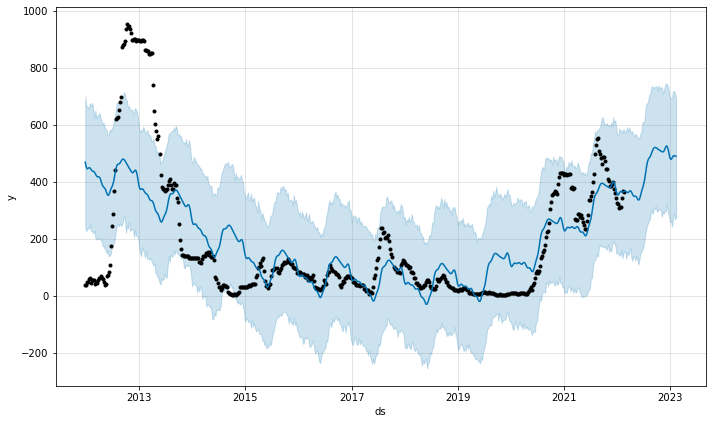

In [88]:
fig1nrr = mnrr.plot(forecastnrr)

In [89]:
df_cvnrr = cross_validation(mnrr, initial='2190 days', period='365 days', horizon = '8 days')
df_pnrr = performance_metrics(df_cvnrr)
df_pnrr

INFO:prophet:Making 5 forecasts with cutoffs between 2018-02-15 00:00:00 and 2022-02-14 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,14.586893,3.819279,3.819279,0.010349,0.010349,0.010403,1.0
1,2 days,77430.742327,278.263800,278.263800,0.734187,0.734187,1.160025,0.0
2,3 days,1069.495209,32.703138,32.703138,4.770281,4.770281,2.000000,1.0
3,4 days,1154.168829,33.973060,33.973060,1.283116,1.283116,2.000000,1.0
4,5 days,8461.921935,91.988705,91.988705,1.085236,1.085236,2.000000,1.0
5,8 days,7.684543,2.772101,2.772101,0.007589,0.007589,0.007561,1.0


### 6. South

In [90]:
dfs = df[df['Region']=='South']
dfs

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID,wsum,FIPS STR,roff,evap,Region
6903,2011-12-27,5003,Ashley County,AR,78.57,21.43,0.00,0.00,0.00,0.0,2011-12-27,2012-01-02,1,21.43,5003,-9999.0,-9999.0,South
6904,2012-01-03,5003,Ashley County,AR,78.57,21.43,0.00,0.00,0.00,0.0,2012-01-03,2012-01-09,1,21.43,5003,-9999.0,-9999.0,South
6905,2012-01-10,5003,Ashley County,AR,78.57,21.43,0.00,0.00,0.00,0.0,2012-01-10,2012-01-16,1,21.43,5003,-9999.0,-9999.0,South
6906,2012-01-17,5003,Ashley County,AR,100.00,0.00,0.00,0.00,0.00,0.0,2012-01-17,2012-01-23,1,0.00,5003,-9999.0,-9999.0,South
6907,2012-01-24,5003,Ashley County,AR,100.00,0.00,0.00,0.00,0.00,0.0,2012-01-24,2012-01-30,1,0.00,5003,-9999.0,-9999.0,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207616,2022-01-25,48431,Sterling County,TX,0.00,100.00,100.00,100.00,38.25,0.0,2022-01-25,2022-01-31,1,753.00,48431,-9999.0,-9999.0,South
207617,2022-02-01,48431,Sterling County,TX,0.00,100.00,100.00,100.00,38.25,0.0,2022-02-01,2022-02-07,1,753.00,48431,-9999.0,-9999.0,South
207618,2022-02-08,48431,Sterling County,TX,0.00,100.00,100.00,45.36,8.83,0.0,2022-02-08,2022-02-14,1,471.40,48431,-9999.0,-9999.0,South
207619,2022-02-15,48431,Sterling County,TX,0.00,100.00,100.00,45.36,8.83,0.0,2022-02-15,2022-02-21,1,471.40,48431,-9999.0,-9999.0,South


In [91]:
dfs = dfs.groupby('MapDate').mean()
dfs = dfs.reset_index(level=0)
dfs = dfs[['MapDate','wsum']]
dfs = dfs.rename(columns={"MapDate": "ds", "wsum": "y"})

In [93]:
ms = Prophet()
ms.fit(dfs)
futures = ms.make_future_dataframe(periods=51,freq='W')
futures.tail(100)
forecasts = ms.predict(futures)
forecasts[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(100)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
482,2021-03-23,123.910375,1.266701,253.395864
483,2021-03-30,124.509685,-1.357073,249.079617
484,2021-04-06,120.829390,-2.936710,247.776334
485,2021-04-13,116.525815,-10.719076,238.972016
486,2021-04-20,114.324382,-19.021948,241.403032
...,...,...,...,...
577,2023-01-15,166.883505,43.381155,294.002655
578,2023-01-22,165.409464,41.282016,292.767170
579,2023-01-29,169.136676,41.880498,289.248855
580,2023-02-05,175.641784,56.067460,300.534345


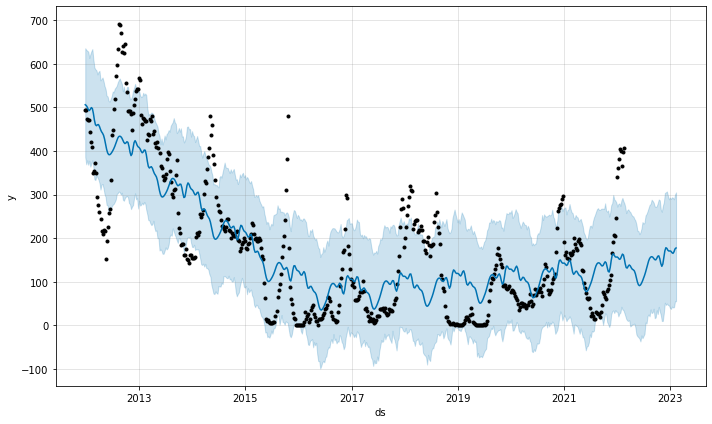

In [94]:
fig1s = ms.plot(forecasts)
plt.title('south')

In [95]:
df_cvs = cross_validation(ms, initial='2190 days', period='365 days', horizon = '8 days')
df_ps = performance_metrics(df_cvs)
df_ps

INFO:prophet:Making 5 forecasts with cutoffs between 2018-02-15 00:00:00 and 2022-02-14 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,69207.042118,263.072313,263.072313,0.661503,0.661503,0.988426,0.0
1,2 days,3869.225596,62.203100,62.203100,0.384593,0.384593,0.476156,1.0
2,3 days,1126.159168,33.558295,33.558295,0.670503,0.670503,0.502155,1.0
3,4 days,11606.852215,107.735102,107.735102,9.009760,9.009760,1.636686,1.0
4,5 days,51580.268372,227.112898,227.112898,0.737516,0.737516,1.168356,0.0
5,8 days,80781.296843,284.220507,284.220507,0.697555,0.697555,1.071147,0.0


### 7. OhioValley

In [96]:
dfo = df[df['Region']=='OhioValley']
dfo

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID,wsum,FIPS STR,roff,evap,Region
62658,2011-12-27,17001,Adams County,IL,100.0,0.0,0.0,0.0,0.0,0.0,2011-12-27,2012-01-02,1,0.0,17001,-9999.0,-9999.0,OhioValley
62659,2012-01-03,17001,Adams County,IL,100.0,0.0,0.0,0.0,0.0,0.0,2012-01-03,2012-01-09,1,0.0,17001,-9999.0,-9999.0,OhioValley
62660,2012-01-10,17001,Adams County,IL,100.0,0.0,0.0,0.0,0.0,0.0,2012-01-10,2012-01-16,1,0.0,17001,-9999.0,-9999.0,OhioValley
62661,2012-01-17,17001,Adams County,IL,100.0,0.0,0.0,0.0,0.0,0.0,2012-01-17,2012-01-23,1,0.0,17001,-9999.0,-9999.0,OhioValley
62662,2012-01-24,17001,Adams County,IL,100.0,0.0,0.0,0.0,0.0,0.0,2012-01-24,2012-01-30,1,0.0,17001,-9999.0,-9999.0,OhioValley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227794,2022-01-25,54077,Preston County,WV,100.0,0.0,0.0,0.0,0.0,0.0,2022-01-25,2022-01-31,1,0.0,54077,-9999.0,-9999.0,OhioValley
227795,2022-02-01,54077,Preston County,WV,100.0,0.0,0.0,0.0,0.0,0.0,2022-02-01,2022-02-07,1,0.0,54077,-9999.0,-9999.0,OhioValley
227796,2022-02-08,54077,Preston County,WV,100.0,0.0,0.0,0.0,0.0,0.0,2022-02-08,2022-02-14,1,0.0,54077,-9999.0,-9999.0,OhioValley
227797,2022-02-15,54077,Preston County,WV,100.0,0.0,0.0,0.0,0.0,0.0,2022-02-15,2022-02-21,1,0.0,54077,-9999.0,-9999.0,OhioValley


In [97]:
dfo = dfo.groupby('MapDate').mean()
dfo = dfo.reset_index(level=0)
dfo = dfo[['MapDate','wsum']]
dfo = dfo.rename(columns={"MapDate": "ds", "wsum": "y"})

In [98]:
mo = Prophet()
mo.fit(dfo)
futureo = mo.make_future_dataframe(periods=51,freq='W')
futureo.tail(100)
forecasto = mo.predict(futureo)
forecasto[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(100)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
482,2021-03-23,-9.025183,-91.953776,77.768814
483,2021-03-30,-10.345175,-92.496675,81.425599
484,2021-04-06,-11.879876,-98.561783,71.438312
485,2021-04-13,-12.549598,-100.021230,69.085773
486,2021-04-20,-11.139474,-101.285333,75.534812
...,...,...,...,...
577,2023-01-15,0.441035,-78.868574,86.283243
578,2023-01-22,1.179991,-83.248201,93.731213
579,2023-01-29,0.690476,-89.185381,85.562095
580,2023-02-05,-1.020329,-90.751670,79.854137


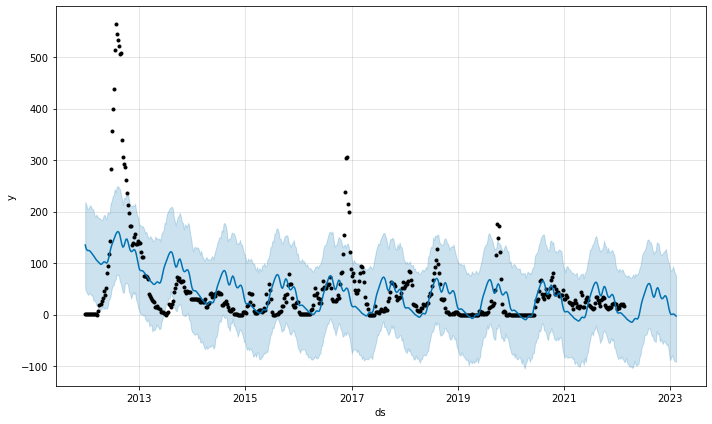

In [99]:
fig1o = mo.plot(forecasto)

In [100]:
df_cvo = cross_validation(mo, initial='2190 days', period='365 days', horizon = '8 days')
df_po = performance_metrics(df_cvo)
df_po

INFO:prophet:Making 5 forecasts with cutoffs between 2018-02-15 00:00:00 and 2022-02-14 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,1 days,478.099282,21.865482,21.865482,1.103403,2.000000,1.0
1,2 days,543.288826,23.308557,23.308557,1.055010,2.000000,1.0
2,3 days,2.676203,1.635910,1.635910,inf,2.000000,1.0
3,4 days,31.718192,5.631891,5.631891,inf,2.000000,1.0
4,5 days,2210.648248,47.017531,47.017531,0.816713,1.380415,1.0
5,8 days,443.019882,21.048037,21.048037,1.234895,2.000000,1.0


### 8. Southeast

In [101]:
dfse = df[df['Region']=='Southeast']
dfse

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID,wsum,FIPS STR,roff,evap,Region
0,2011-12-27,1007,Bibb County,AL,0.00,100.00,54.54,0.0,0.0,0.0,2011-12-27,2012-01-02,1,209.08,1007,-9999.0,-9999.0,Southeast
1,2012-01-03,1007,Bibb County,AL,0.00,100.00,54.54,0.0,0.0,0.0,2012-01-03,2012-01-09,1,209.08,1007,-9999.0,-9999.0,Southeast
2,2012-01-10,1007,Bibb County,AL,0.00,100.00,54.54,0.0,0.0,0.0,2012-01-10,2012-01-16,1,209.08,1007,-9999.0,-9999.0,Southeast
3,2012-01-17,1007,Bibb County,AL,41.41,58.59,0.00,0.0,0.0,0.0,2012-01-17,2012-01-23,1,58.59,1007,-9999.0,-9999.0,Southeast
4,2012-01-24,1007,Bibb County,AL,100.00,0.00,0.00,0.0,0.0,0.0,2012-01-24,2012-01-30,1,0.00,1007,-9999.0,-9999.0,Southeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217705,2022-01-25,51183,Sussex County,VA,100.00,0.00,0.00,0.0,0.0,0.0,2022-01-25,2022-01-31,1,0.00,51183,-9999.0,-9999.0,Southeast
217706,2022-02-01,51183,Sussex County,VA,100.00,0.00,0.00,0.0,0.0,0.0,2022-02-01,2022-02-07,1,0.00,51183,-9999.0,-9999.0,Southeast
217707,2022-02-08,51183,Sussex County,VA,100.00,0.00,0.00,0.0,0.0,0.0,2022-02-08,2022-02-14,1,0.00,51183,-9999.0,-9999.0,Southeast
217708,2022-02-15,51183,Sussex County,VA,100.00,0.00,0.00,0.0,0.0,0.0,2022-02-15,2022-02-21,1,0.00,51183,-9999.0,-9999.0,Southeast


In [102]:
dfse = dfse.groupby('MapDate').mean()
dfse = dfse.reset_index(level=0)
dfse = dfse[['MapDate','wsum']]
dfse = dfse.rename(columns={"MapDate": "ds", "wsum": "y"})

In [103]:
mse = Prophet()
mse.fit(dfse)
futurese = mse.make_future_dataframe(periods=51,freq='W')
futurese.tail(100)
forecastse = mse.predict(futurese)
forecastse[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(100)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
482,2021-03-23,18.785651,-81.999974,117.600430
483,2021-03-30,22.355317,-81.506255,121.725698
484,2021-04-06,26.393305,-70.811421,137.370647
485,2021-04-13,29.617915,-75.579167,132.673575
486,2021-04-20,30.301043,-70.080697,131.857162
...,...,...,...,...
577,2023-01-15,3.721023,-96.386730,111.312686
578,2023-01-22,4.312399,-99.745703,107.907042
579,2023-01-29,7.344197,-100.899511,110.055562
580,2023-02-05,7.694213,-99.332494,114.769001


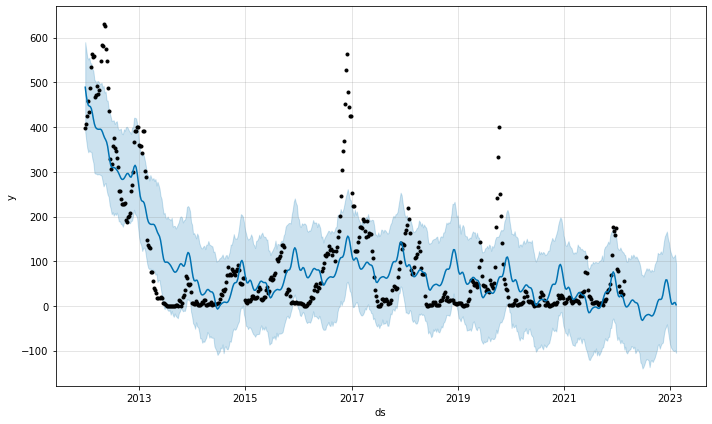

In [104]:
fig1se = mse.plot(forecastse)

In [105]:
df_cvse = cross_validation(mse, initial='2190 days', period='365 days', horizon = '8 days')
df_pse = performance_metrics(df_cvse)
df_pse

INFO:prophet:Making 5 forecasts with cutoffs between 2018-02-15 00:00:00 and 2022-02-14 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,224.389764,14.979645,14.979645,0.543387,0.543387,0.746096,1.0
1,2 days,14.553017,3.814842,3.814842,0.325999,0.325999,0.389485,1.0
2,3 days,1612.002838,40.149755,40.149755,17.972137,17.972137,1.799721,1.0
3,4 days,327.987022,18.110412,18.110412,9.079721,9.079721,1.638980,1.0
4,5 days,5456.004483,73.864772,73.864772,1.036681,1.036681,0.682772,1.0
5,8 days,2706.278358,52.021903,52.021903,0.944709,0.944709,1.790423,1.0


### 9. UpperMidwest

In [106]:
dfu = df[df['Region']=='UpperMidwest']
dfu

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID,wsum,FIPS STR,roff,evap,Region
70092,2011-12-27,19009,Audubon County,IA,55.69,44.31,0.00,0.0,0.0,0.0,2011-12-27,2012-01-02,1,44.31,19009,-9999.0,-9999.0,UpperMidwest
70093,2012-01-03,19009,Audubon County,IA,55.69,44.31,0.00,0.0,0.0,0.0,2012-01-03,2012-01-09,1,44.31,19009,-9999.0,-9999.0,UpperMidwest
70094,2012-01-10,19009,Audubon County,IA,55.69,44.31,0.00,0.0,0.0,0.0,2012-01-10,2012-01-16,1,44.31,19009,-9999.0,-9999.0,UpperMidwest
70095,2012-01-17,19009,Audubon County,IA,55.69,44.31,0.00,0.0,0.0,0.0,2012-01-17,2012-01-23,1,44.31,19009,-9999.0,-9999.0,UpperMidwest
70096,2012-01-24,19009,Audubon County,IA,55.69,44.31,0.00,0.0,0.0,0.0,2012-01-24,2012-01-30,1,44.31,19009,-9999.0,-9999.0,UpperMidwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234697,2022-01-25,55131,Washington County,WI,0.00,100.00,53.56,0.0,0.0,0.0,2022-01-25,2022-01-31,1,207.12,55131,-9999.0,-9999.0,UpperMidwest
234698,2022-02-01,55131,Washington County,WI,0.00,100.00,53.56,0.0,0.0,0.0,2022-02-01,2022-02-07,1,207.12,55131,-9999.0,-9999.0,UpperMidwest
234699,2022-02-08,55131,Washington County,WI,0.00,100.00,100.00,0.0,0.0,0.0,2022-02-08,2022-02-14,1,300.00,55131,-9999.0,-9999.0,UpperMidwest
234700,2022-02-15,55131,Washington County,WI,0.00,100.00,100.00,0.0,0.0,0.0,2022-02-15,2022-02-21,1,300.00,55131,-9999.0,-9999.0,UpperMidwest


In [107]:
dfu = dfu.groupby('MapDate').mean()
dfu = dfu.reset_index(level=0)
dfu = dfu[['MapDate','wsum']]
dfu = dfu.rename(columns={"MapDate": "ds", "wsum": "y"})

In [108]:
mu = Prophet()
mu.fit(dfu)
futureu = mu.make_future_dataframe(periods=51,freq='W')
futureu.tail(100)
forecastu = mse.predict(futureu)
forecastu[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(100)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
482,2021-03-23,18.785651,-82.330458,118.728752
483,2021-03-30,22.355317,-87.862801,128.689130
484,2021-04-06,26.393305,-75.075353,126.057655
485,2021-04-13,29.617915,-76.345783,132.966785
486,2021-04-20,30.301043,-73.187442,133.385163
...,...,...,...,...
577,2023-01-15,3.721023,-104.958288,105.283549
578,2023-01-22,4.312399,-102.676635,113.559884
579,2023-01-29,7.344197,-98.133849,116.760726
580,2023-02-05,7.694213,-92.558401,112.843656


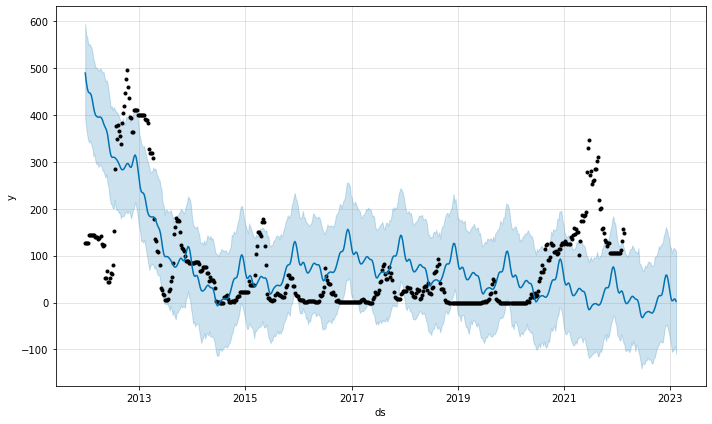

In [109]:
fig1u = mu.plot(forecastu)

In [110]:
df_cvu = cross_validation(mu, initial='2190 days', period='365 days', horizon = '8 days')
df_pu = performance_metrics(df_cvu)
df_pu

INFO:prophet:Making 5 forecasts with cutoffs between 2018-02-15 00:00:00 and 2022-02-14 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,1 days,118.412717,10.881761,10.881761,0.069148,0.066837,1.0
1,2 days,9357.983481,96.736671,96.736671,0.697010,1.069863,0.0
2,3 days,8.194343,2.862576,2.862576,inf,2.000000,1.0
3,4 days,79.379356,8.909509,8.909509,inf,2.000000,1.0
4,5 days,511.894180,22.625079,22.625079,1.083815,2.000000,1.0
5,8 days,476.363313,21.825749,21.825749,0.146670,0.136648,1.0


In [134]:
df = pd.read_csv('./USDM_SET_full.csv', parse_dates=True, low_memory=False).drop(columns=['Unnamed: 0'])
df[['D0','D1','D2','D3','D4','wsum']]

,D0,D1,D2,D3,D4,wsum
0,100.00,54.54,0.0,0.00,0.0,209.08
1,100.00,54.54,0.0,0.00,0.0,209.08
2,100.00,54.54,0.0,0.00,0.0,209.08
3,58.59,0.00,0.0,0.00,0.0,58.59
4,0.00,0.00,0.0,0.00,0.0,0.00
...,...,...,...,...,...,...
238945,100.00,100.00,100.0,0.00,0.0,600.00
238946,100.00,100.00,100.0,0.00,0.0,600.00
238947,100.00,100.00,100.0,16.75,0.0,667.00
238948,100.00,100.00,100.0,52.39,0.0,809.56
